In [1]:
#nativos
import os
import unicodedata
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#terceros
import pandas as pd
import numpy as np
import pymssql
import missingno as msnolistadconoce
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")


from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

now = datetime.now()
ultimo_mes_cerrado =  datetime.strptime((now - relativedelta(months=1)).strftime('%Y-%m'), '%Y-%m').strftime('%Y-%m-%d')
ultimo_mes_cerrado

'2021-05-01'

In [2]:
from utils_alertas import *

EJEMPLO:
202104 mes cerrado de la cosecha de 202104 [202011, 202012, 202101, 202102, 202103, 202104] [202102, 202103, 202104] 
 historia 
 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104] 
 ---------------------------------------------------------------------------------------------------- 
 [202105, 202106] 
 ---------------------------------------------------------------------------------------------------- 
 [202005, 202006]
EJEMPLO:
202003 mes cerrado de la cosecha de 202003 [201910, 201911, 201912, 202001, 202002, 202003] [202001, 202002, 202003] 
 historia 
 [201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003] 
 ---------------------------------------------------------------------------------------------------- 
 [202004, 202005] 
 ---------------------------------------------------------------------------------------------------- 
 [201904, 201905]


In [3]:
import gc



In [4]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
import time
time.sleep(10)
import gc
gc.collect()

48

In [5]:
"""
sql_cef = """
    #SELECT * FROM ODS.HD_VMVP_INFO_FICHA_COVID WITH (NOLOCK)
"""

cef = pd.read_sql(
   sql_cef , connection_market
)
print(cef.shape)

connection_market.close()
cef.head(3)
"""

'\n\ncef = pd.read_sql(\n   sql_cef , connection_market\n)\nprint(cef.shape)\n\nconnection_market.close()\ncef.head(3)\n'

In [6]:
#list(cef.columns)

In [7]:
import gc
gc.collect()

from datetime import datetime
print(datetime.now().year)

2021


In [8]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
import time
time.sleep(10)
import gc
gc.collect()

22

### >> Lectura de SQL

In [9]:
sql_cef = """
    SELECT * FROM ODS.HM_VMVP_CEF_SITUACION_ALERTAS_CARTERA_BE
"""

cef = pd.read_sql(
   sql_cef , connection_market
)
print(cef.shape)

connection_market.close()
cef.head(3)

(40790, 61)


,tc_punta,COD_UNICO,DESRAZONSOCIAL,FECPROCESO,MES,DIAS,CODTIPESTADOFINANCIERO,DESTIPESTADOFINANCIERO,DESESTADO,CODMONEDA,...,RMET_11_METODIZADO,RMET_9_METODIZADO,RSOL_14_SOLVENCIA,RSOL_1B_SOLVENCIA,RSOL_18_SOLVENCIA,RRE_13_RENTABILIDAD,RNK_ANUAL,PERIODO,ORDEN,ORDEN_ANUAL
0,3.383,0003918489,,2019-09-30,9,270,3,SITUACION,PENDIENTE,1,...,0.885326,0.0,0.742281,0.812792,0.395646,0.008239,3,201909,7,10
1,3.287,0003918489,,2019-06-30,6,180,3,SITUACION,PENDIENTE,1,...,0.883658,0.0,0.320488,0.735728,0.395659,0.009807,4,201906,8,11
2,3.318,0003918489,,2019-03-31,3,90,3,SITUACION,VALIDADO,1,...,2.756900,0.0,0.516866,0.822742,0.395653,0.011102,5,201903,9,9


In [10]:
cef['FECPROCESO'] = pd.to_datetime(
    cef['FECPROCESO'], errors='coerce', format='%Y-%m-%d'
)

cef['ANIO'] =cef['FECPROCESO'].dt.year

cef.head(3)

,tc_punta,COD_UNICO,DESRAZONSOCIAL,FECPROCESO,MES,DIAS,CODTIPESTADOFINANCIERO,DESTIPESTADOFINANCIERO,DESESTADO,CODMONEDA,...,RMET_9_METODIZADO,RSOL_14_SOLVENCIA,RSOL_1B_SOLVENCIA,RSOL_18_SOLVENCIA,RRE_13_RENTABILIDAD,RNK_ANUAL,PERIODO,ORDEN,ORDEN_ANUAL,ANIO
0,3.383,0003918489,,2019-09-30,9,270,3,SITUACION,PENDIENTE,1,...,0.0,0.742281,0.812792,0.395646,0.008239,3,201909,7,10,2019
1,3.287,0003918489,,2019-06-30,6,180,3,SITUACION,PENDIENTE,1,...,0.0,0.320488,0.735728,0.395659,0.009807,4,201906,8,11,2019
2,3.318,0003918489,,2019-03-31,3,90,3,SITUACION,VALIDADO,1,...,0.0,0.516866,0.822742,0.395653,0.011102,5,201903,9,9,2019


### >> Hallazgo de casos con contraste válido

In [11]:
cef_clientes = list(cef['COD_UNICO'].unique())
print(len(cef_clientes))

7626


In [12]:
cef_cierre_anio = cef[
    (cef['RNK_ANUAL'] == 1) &  (cef['ORDEN'] > 1)  #(cef['MES'] == 12) 
].sort_values(
    by=['ORDEN'], ascending=True
)
#.drop_duplicates(
#    subset=['COD_UNICO'], keep='first'
#)
print(cef_cierre_anio.shape)

cef_cierre_anio = cef_cierre_anio[cef_cierre_anio['ANIO'] >= datetime.now().year - 2]
print(cef_cierre_anio.shape)

(10881, 62)
(4966, 62)


In [13]:
clientes_cierre_anio = list(cef_cierre_anio['COD_UNICO'].unique())
len(clientes_cierre_anio)

4254

In [14]:
clientes_sin_punto_de_comparacion = set(cef_clientes) - set(clientes_cierre_anio)
print(len(clientes_sin_punto_de_comparacion))
print(clientes_sin_punto_de_comparacion)

3372
{'0015215982', '0010173273', '0014071249', '0008199170', '0015763891', '0010190631', '0015500408', '0015457431', '0016680540', '0008962547', '0017828877', '0013837557', '0009406551', '0011038192', '0014433252', '0013547086', '0011949569', '0010654214', '0010600260', '0011183761', '0015517966', '0015800566', '0011951724', '0016081277', '0015557899', '0016229938', '0015149023', '0011667040', '0011866857', '0015817570', '0014120811', '0015954556', '0011688324', '0007410921', '0011870389', '0015489262', '0013331367', '0016516997', '0014967164', '0011871566', '0013926609', '0013312085', '0015379469', '0014427290', '0014316236', '0011237255', '0010470854', '0016797332', '0014941831', '0015635517', '0010567220', '0015807574', '0011353177', '0010361699', '0014676300', '0015176229', '0010643953', '0017037548', '0016069198', '0010897174', '0008823753', '0008763808', '0000946640', '0015633489', '0016189337', '0010661396', '0015549360', '0011268900', '0013878377', '0016608167', '0010091158', 

In [15]:
#cef[cef['COD_UNICO'] == '0014809819'][['COD_UNICO', 'FECPROCESO','MES', 'RNK_ANUAL', 'ORDEN', 'ORDEN_ANUAL', 'RRE_13_RENTABILIDAD']]

In [16]:
#cef[cef['COD_UNICO'] == '0012429579'][['COD_UNICO', 'FECPROCESO','MES', 'RNK_ANUAL', 'ORDEN', 'ORDEN_ANUAL', 'RRE_13_RENTABILIDAD']]

In [17]:
sufijo = '_cierre_anterior'

In [18]:
cols_llave = ['COD_UNICO']

cef_cierre_anio.columns = [col + sufijo if col not in cols_llave else col for col in cef_cierre_anio.columns ]
cef_cierre_anio.head(3)

,tc_punta_cierre_anterior,COD_UNICO,DESRAZONSOCIAL_cierre_anterior,FECPROCESO_cierre_anterior,MES_cierre_anterior,DIAS_cierre_anterior,CODTIPESTADOFINANCIERO_cierre_anterior,DESTIPESTADOFINANCIERO_cierre_anterior,DESESTADO_cierre_anterior,CODMONEDA_cierre_anterior,...,RMET_9_METODIZADO_cierre_anterior,RSOL_14_SOLVENCIA_cierre_anterior,RSOL_1B_SOLVENCIA_cierre_anterior,RSOL_18_SOLVENCIA_cierre_anterior,RRE_13_RENTABILIDAD_cierre_anterior,RNK_ANUAL_cierre_anterior,PERIODO_cierre_anterior,ORDEN_cierre_anterior,ORDEN_ANUAL_cierre_anterior,ANIO_cierre_anterior
40789,3.314,0017844714,,2019-12-31,12,360,2,SUNAT,PENDIENTE,1,...,0.000000,0.000000,1.000000,-0.080000,0.000000,1,201912,2,2,2019
11905,3.314,0000996991,,2019-12-31,12,360,3,SITUACION,PENDIENTE,1,...,-0.000000,370.079086,0.212904,1.854174,0.118623,1,201912,2,1,2019
30149,3.314,0013770340,,2019-12-31,12,360,2,SUNAT,PENDIENTE,1,...,0.279693,2.916667,0.429487,0.984848,0.000000,1,201912,2,1,2019


In [19]:
cef.shape

(40790, 62)

### >> Nos quedamos con clientes que tienen contraste válido

In [20]:
cef = cef[~cef['COD_UNICO'].isin(list(clientes_sin_punto_de_comparacion))]
print(cef.shape)

cef_clientes = list(cef['COD_UNICO'].unique())
print(len(cef_clientes))

(33258, 62)
4254


### >> Hacemos un LEFT JOIN y luego nos quedamos con los meses a comparar

In [21]:
cef = cef.merge(cef_cierre_anio, how='left', on=['COD_UNICO'])
cef.shape

(41233, 123)

In [22]:
[col for col in cef.columns if 'fec' in col.lower()]

['FECPROCESO', 'FECPROCESO_cierre_anterior']

In [23]:
cef['FECPROCESO'] = pd.to_datetime(
    cef['FECPROCESO'], errors='coerce', format='%Y-%m-%d'
)
cef['FECPROCESO_cierre_anterior'] = pd.to_datetime(
    cef['FECPROCESO_cierre_anterior'], errors='coerce', format='%Y-%m-%d'
)

In [24]:
cef =  cef[cef['FECPROCESO'] > cef['FECPROCESO_cierre_anterior']]
cef.shape

(11865, 123)

### >> Utilitarios

In [25]:
def get_cobertura(gas_finan, deuda_co, fec_proceso, edibta, mto_partici, mto_imprenta, mto_pasc, mto_imprenta_anterior):
    if gas_finan + deuda_co == 0:
        return 0
    elif fec_proceso.month == 12:
        return (
            (edibta * 360 /  (fec_proceso.month * 30)) - mto_partici - mto_imprenta
        ) / (
             (gas_finan * 360 /  (fec_proceso.month * 30)) + mto_pasc
        )
    elif fec_proceso.month != 12:
        return (
            (edibta * 360 /  (fec_proceso.month * 30)) - mto_partici - mto_imprenta_anterior
        ) / (
             (gas_finan * 360 /  (fec_proceso.month * 30)) + mto_pasc
        )
    else:
        pass
    return None

def get_variacion(actual, previo):
    if previo == 0 and (actual == 0 or pd.isnull(actual)):
        return 0
    elif previo == 0:
        return 1
    else:
        return (actual - previo) / previo
    

## >> ROTACION

In [26]:
cef['ROTACION_CTASXCOBRAR_cierre_anterior_imputado'] = cef['ROTACION_CTASXCOBRAR_cierre_anterior'].fillna(0)
cef['ROTACION_CTASXPAGAR_cierre_anterior_imputado'] = cef['ROTACION_CTASXPAGAR_cierre_anterior'].fillna(0)
cef['ROTACION_INVENTARIOS_cierre_anterior_imputado'] = cef['ROTACION_INVENTARIOS_cierre_anterior'].fillna(0)
cef['ROTACION_CTASXCOBRAR_VAR_DIAS'] = cef[['ROTACION_CTASXCOBRAR', 'ROTACION_CTASXCOBRAR_cierre_anterior_imputado']].apply(lambda _: _[0] - _[1], axis=1)
cef['ROTACION_CTASXPAGAR_VAR_DIAS'] = cef[['ROTACION_CTASXPAGAR', 'ROTACION_CTASXPAGAR_cierre_anterior_imputado']].apply(lambda _: _[0] - _[1], axis=1)
cef['ROTACION_INVENTARIOS_VAR_DIAS'] = cef[['ROTACION_INVENTARIOS', 'ROTACION_INVENTARIOS_cierre_anterior_imputado']].apply(lambda _: _[0] - _[1], axis=1)
cef['ROTACION_CTASXCOBRAR_VAR'] = cef[['ROTACION_CTASXCOBRAR', 'ROTACION_CTASXCOBRAR_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['ROTACION_CTASXPAGAR_VAR'] = cef[['ROTACION_CTASXPAGAR', 'ROTACION_CTASXPAGAR_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['ROTACION_INVENTARIOS_VAR'] = cef[['ROTACION_INVENTARIOS', 'ROTACION_INVENTARIOS_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)

## >> ANUAL

In [27]:
cef['VENTAS_NETAS_ANUAL_cierre_anterior_imputado'] = cef['VENTAS_NETAS_ANUAL_cierre_anterior'].fillna(0)
cef['COSTO_VENTAS_ANUAL_cierre_anterior_imputado'] = cef['COSTO_VENTAS_ANUAL_cierre_anterior'].fillna(0)
cef['EBITDA_ANUAL_cierre_anterior_imputado'] = cef['EBITDA_ANUAL_cierre_anterior'].fillna(0)
cef['VENTAS_NETAS_ANUAL_imputado'] = cef['VENTAS_NETAS_ANUAL'].fillna(0)
cef['COSTO_VENTAS_ANUAL_imputado'] = cef['COSTO_VENTAS_ANUAL'].fillna(0)
cef['EBITDA_ANUAL_imputado'] = cef['EBITDA_ANUAL'].fillna(0)
cef['VENTAS_NETAS_VAR'] = cef[['VENTAS_NETAS_ANUAL_imputado', 'VENTAS_NETAS_ANUAL_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['COSTO_VENTAS_VAR'] = cef[['COSTO_VENTAS_ANUAL_imputado', 'COSTO_VENTAS_ANUAL_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['EBITDA_ANUAL_VAR'] = cef[['EBITDA_ANUAL_imputado', 'EBITDA_ANUAL_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)

## >> otrod

In [28]:
cef['MTO_IMPRENTA_cierre_anterior_imputado'] = cef['MTO_IMPRENTA_cierre_anterior'].fillna(0)
cef['INVERSION_ACTFIJOS_inputado'] = cef['INVERSION_ACTFIJOS'].fillna(0)
cef['INVERSION_ACTFIJOS_ANTERIOR_inputado'] = cef['INVERSION_ACTFIJOS_cierre_anterior'].fillna(0)
cef['CAPITAL_TRABAJO_cierre_anterior_imputado'] = cef['CAPITAL_TRABAJO_cierre_anterior'].fillna(0)
cef['CAPITAL_TRABAJOL_imputado'] = cef['CAPITAL_TRABAJO'].fillna(0)


cef['CAPITAL_TRABAJO_VAR'] = cef[['CAPITAL_TRABAJOL_imputado', 'CAPITAL_TRABAJO_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['INVERSION_ACTFIJOS_ANTERIOR_FLAG'] = cef['INVERSION_ACTFIJOS_ANTERIOR_inputado'].apply(lambda _: 0 if _ == 0 else 1)
cef['INVERSION_ACTFIJOS_VAR'] = cef[['INVERSION_ACTFIJOS_inputado', 'INVERSION_ACTFIJOS_ANTERIOR_inputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['ENDEUDAMIENTO_PAS_VEN_VAR'] = cef[['ENDEUDAMIENTO_PAS_VEN', 'ENDEUDAMIENTO_PAS_VEN_cierre_anterior']].apply(lambda _: _[0] - _[1], axis=1)
cef['APLANCAMIENTO_PATRIMONIAL_VAR'] = cef[['APALANCAMIENTO_PATRIMONIAL', 'APALANCAMIENTO_PATRIMONIAL_cierre_anterior']].apply(lambda _: _[0] - _[1], axis=1)
cef['COBERTURA_SERVICIO_DEUDA'] = cef[[
    'MTO_GASFINANCIEROS', 'MTO_PASC_DEUCORRIENTE_LP', 'FECPROCESO', 'EBITDA', 'MTO_PARTICIPACION', 'MTO_IMPRENTA', 
    'MTO_PASC_DEUCORRIENTE_LP', 'MTO_IMPRENTA_cierre_anterior_imputado']].apply(
    lambda _: get_cobertura(_[0], _[1], _[2], _[3], _[4], _[5], _[6], _[7]), axis=1
)
cef['DTOTAL_S_EBITDA_VAR'] = cef[['DTOTAL_S_EBITDA', 'DTOTAL_S_EBITDA_cierre_anterior']].apply(lambda _: _[0] - _[1], axis=1)

cef['DTOTAL_S_VENTAS_cierre_anterior_imputado'] = cef['DTOTAL_S_VENTAS_cierre_anterior'].fillna(0)
cef['DTOTALCAJA_S_EBITDA_cierre_anterior_imputado'] = cef['DTOTALCAJA_S_EBITDA_cierre_anterior'].fillna(0)
cef['EBITDA_S_SERVDEUDA_anterior_imputado'] = cef['EBITDA_S_SERVDEUDA_cierre_anterior'].fillna(0)

cef['DTOTAL_S_VENTAS_VAR'] = cef[['DTOTAL_S_VENTAS', 'DTOTAL_S_VENTAS_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['DTOTALCAJA_S_EBITDA_VAR'] = cef[['DTOTALCAJA_S_EBITDA', 'DTOTALCAJA_S_EBITDA_cierre_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)
cef['EBITDA_S_SERVDEUDA_VAR'] = cef[['EBITDA_S_SERVDEUDA', 'EBITDA_S_SERVDEUDA_anterior_imputado']].apply(lambda _: get_variacion(_[0], _[1]), axis=1)

In [29]:
[col for col in cef.columns if 'periodo' in col.lower()]

['PERIODO', 'PERIODO_cierre_anterior']

In [30]:
#raise Exception("PARADA  PARA VALIDAICON DE AUMENTO DE COLUMNAS CEF")

In [31]:
cef['RAZON_SOCIAL'] = cef['DESRAZONSOCIAL'].combine_first(cef['DESRAZONSOCIAL_cierre_anterior'])
cef['FECHA_CEF'] = cef['FECPROCESO'].copy()
cef['MONEDA'] = cef['CODMONEDA'].copy()
cef['TIPO_CAMBIO'] = cef['tc_punta'].copy()
cef['TIPO_CAMBIO_FECHA'] = cef['FECPROCESO'].copy()
cef['PERIODO_CEF_ANTERIOR'] = cef['PERIODO_cierre_anterior'].copy()



final_columns = ['COD_UNICO', 'RAZON_SOCIAL','PERIODO', 'PERIODO_CEF_ANTERIOR', 'ORDEN', 'ORDEN_ANUAL', 'FECHA_CEF', 'DESTIPESTADOFINANCIERO', 'DESESTADO', 'MONEDA',
                 'TIPO_CAMBIO', 'TIPO_CAMBIO_FECHA', 'CAJA', 'VENTAS_NETAS', 'COSTO_VENTAS', 'EBITDA', 'PATRIMONIO', 'INVERSION_ACTFIJOS_ANTERIOR_FLAG',
                'INVERSION_ACTFIJOS_VAR', 'INVERSION_ACTFIJOS', 'VENTAS_NETAS_ANUAL', 'COSTO_VENTAS_ANUAL', 'EBITDA_ANUAL', 'DEUDA_TOTAL', 
                 'UTILIDAD_ANTES_IMP', 'UTILIDAD', 'UTILIDAD_ANTES_IMP_ANUAL', 'UTILIDAD_ANUAL', 'INVERSION_ACTFIJOS_ANUAL', 'CAPITAL_TRABAJO',
                 'ROTACION_CTASXCOBRAR', 'ROTACION_CTASXPAGAR', 'ROTACION_INVENTARIOS', 'DTOTAL_S_VENTAS', 'DTOTAL_S_EBITDA', 'EBITDA_S_SERVDEUDA',
                 'COBERTURA_FAL', 'COBERTURA_SERVICIO_DEUDA_ANT', 'ENDEUDAMIENTO_PAS_VEN', 'ENDEUDAMIENTO_PAS_VEN_VAR', 'APLANCAMIENTO_PATRIMONIAL_VAR',
                 'RAC_IBK6_ACTIVIDAD', 'RDEU_1_COSTODEUDA', 'RLI_6_LIQUIDEZ', 'RMET_11_METODIZADO', 'RMET_9_METODIZADO', 'RSOL_14_SOLVENCIA', 
                 'RSOL_1B_SOLVENCIA', 'RRE_13_RENTABILIDAD', 'COBERTURA_SERVICIO_DEUDA', 'ENDEUDAMIENTO_PAS_VEN_VAR', 'APLANCAMIENTO_PATRIMONIAL_VAR',
                 'RAC_IBK6_ACTIVIDAD', 'RDEU_1_COSTODEUDA', 'RLI_6_LIQUIDEZ', 'RMET_11_METODIZADO', 'RMET_9_METODIZADO', 'RSOL_14_SOLVENCIA',
                 'RSOL_18_SOLVENCIA', 'RRE_13_RENTABILIDAD', 'COBERTURA_SERVICIO_DEUDA', 'VENTAS_NETAS_VAR', 'COSTO_VENTAS_VAR', 'EBITDA_ANUAL_VAR', 
                 'CAPITAL_TRABAJO_VAR', 'ROTACION_CTASXCOBRAR_VAR_DIAS', 'ROTACION_CTASXPAGAR_VAR_DIAS', 'ROTACION_INVENTARIOS_VAR_DIAS',
                 'ROTACION_CTASXCOBRAR_VAR', 'ROTACION_CTASXPAGAR_VAR', 'ROTACION_INVENTARIOS_VAR', 'DTOTAL_S_VENTAS_VAR', 'DTOTALCAJA_S_EBITDA_VAR', 
                 'EBITDA_S_SERVDEUDA_VAR', 'DTOTAL_S_EBITDA_VAR'
                ]

cef = cef[list(set(final_columns))]
cef.head(3)

,INVERSION_ACTFIJOS_VAR,ENDEUDAMIENTO_PAS_VEN,DTOTAL_S_VENTAS,VENTAS_NETAS_ANUAL,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR,DESESTADO,APLANCAMIENTO_PATRIMONIAL_VAR,DTOTALCAJA_S_EBITDA_VAR,COSTO_VENTAS,...,RSOL_18_SOLVENCIA,UTILIDAD_ANUAL,PERIODO_CEF_ANTERIOR,TIPO_CAMBIO_FECHA,INVERSION_ACTFIJOS_ANUAL,RSOL_1B_SOLVENCIA,ROTACION_CTASXCOBRAR_VAR,DTOTAL_S_VENTAS_VAR,RSOL_14_SOLVENCIA,COBERTURA_SERVICIO_DEUDA
8,2.414634,8.310398,2.391437,1308.0,3.102112,152.812500,VALIDADO,0.564546,-1.000000,192.0,...,-0.819001,0.0,201912,2020-06-30,280.0,0.075090,0.960953,1.554316,3.812183,NaN
9,-0.926829,4.353161,1.158070,2404.0,2.911604,80.862944,VALIDADO,0.159902,0.498275,197.0,...,-0.820431,0.0,201912,2020-03-31,12.0,0.072554,0.901938,0.236945,3.258537,NaN
13,0.000000,11.131673,0.000000,281.0,0.000000,0.000000,PENDIENTE,-4.822527,0.472906,NaN,...,1.103937,0.0,201912,2020-12-31,0.0,1.000000,0.000000,0.000000,0.000000,NaN


In [32]:
[col for col in cef.columns if 'DTOTAL_S_EBITDA_VAR' in col.upper()]

['DTOTAL_S_EBITDA_VAR']

In [33]:
cef.shape

(11865, 65)

In [34]:
cef_up = cef.drop(['ORDEN_ANUAL', 'RAZON_SOCIAL'], axis=1).sort_values(by=['COD_UNICO', 'PERIODO'], ascending=True)
cef_up.shape

(11865, 63)

In [35]:
cef_up.head()

,INVERSION_ACTFIJOS_VAR,ENDEUDAMIENTO_PAS_VEN,DTOTAL_S_VENTAS,VENTAS_NETAS_ANUAL,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR,DESESTADO,APLANCAMIENTO_PATRIMONIAL_VAR,DTOTALCAJA_S_EBITDA_VAR,COSTO_VENTAS,...,RSOL_18_SOLVENCIA,UTILIDAD_ANUAL,PERIODO_CEF_ANTERIOR,TIPO_CAMBIO_FECHA,INVERSION_ACTFIJOS_ANUAL,RSOL_1B_SOLVENCIA,ROTACION_CTASXCOBRAR_VAR,DTOTAL_S_VENTAS_VAR,RSOL_14_SOLVENCIA,COBERTURA_SERVICIO_DEUDA
12300,-0.299634,0.665759,0.314188,1.188928e+06,-22.382241,68.985821,PENDIENTE,0.127555,-1.006971,383818.0,...,0.043693,-8607.0,201912,2020-12-31,86227.000000,0.768806,-0.314692,0.221801,1.654437,NaN
12307,-0.560847,0.984106,0.681001,4.618200e+04,19.957637,45.484869,VALIDADO,0.020820,-0.008239,11632.0,...,1.494634,0.0,201912,2020-04-30,498.000000,0.564711,0.218045,0.058811,4.602664,NaN
12306,0.185185,1.052115,0.729615,4.618600e+04,25.435359,57.013713,VALIDADO,0.096114,0.109577,17721.0,...,1.559905,0.0,201912,2020-06-30,896.000000,0.481757,0.277891,0.134395,3.869848,NaN
12305,-0.084656,1.212019,0.923494,4.790933e+04,11.399467,38.154461,VALIDADO,0.307246,0.848297,29509.0,...,1.528340,0.0,201912,2020-09-30,461.333333,0.486231,0.124544,0.435836,4.837526,NaN
12304,1.928571,1.204197,0.904280,4.948691e+04,33.266685,55.640999,VALIDADO,0.296947,1.109135,38011.0,...,1.232224,0.0,201912,2020-11-30,1207.636364,0.542220,0.363451,0.405961,5.893008,NaN


In [36]:
cef_up.describe(include=[object]).columns

Index(['DESESTADO', 'COD_UNICO', 'PERIODO', 'DESTIPESTADOFINANCIERO',
       'PERIODO_CEF_ANTERIOR'],
      dtype='object')

In [37]:
cef_up.to_csv('HM_VMVP_CEF_INDICADORES_MULTI_CORTES.csv', sep='|', index=False)

In [38]:
%%time
"""

from sqlalchemy import create_engine
engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
connection_x = engine.connect()

try:
    cef_up.to_sql(
        name='HM_VMVP_CEF_INDICADORES_MULTI_CORTES',
        schema='ODS',
        con=connection_x, 
        index=False, 
        if_exists='replace'
    )
    connection_x.close()
    correct = 1
except Exception as e:
    print("ERROR: ", str(e))
    correct = 0

print(correct)
"""

Wall time: 981 µs


'\n\nfrom sqlalchemy import create_engine\nengine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\\BDT/MARKET")\nconnection_x = engine.connect()\n\ntry:\n    cef_up.to_sql(\n        name=\'HM_VMVP_CEF_INDICADORES_MULTI_CORTES\',\n        schema=\'ODS\',\n        con=connection_x, \n        index=False, \n        if_exists=\'replace\'\n    )\n    connection_x.close()\n    correct = 1\nexcept Exception as e:\n    print("ERROR: ", str(e))\n    correct = 0\n\nprint(correct)\n'

In [39]:
"""
try:
    connection_market.close()
except:
    pass

#conneciom MARKET
connection = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
import time
time.sleep(1)
import gc
gc.collect()
"""

"\ntry:\n    connection_market.close()\nexcept:\n    pass\n\n#conneciom MARKET\nconnection = pymssql.connect(host='10.11.12.90\\BDT',\n                             user='ibetlmarket',\n                             port=1433,\n                             password='m@rk3t2o15',\n                             database='MARKET'\n                            )\nimport time\ntime.sleep(1)\nimport gc\ngc.collect()\n"

In [40]:
"""
with connection.cursor() as cursor:
    try:
        print("/"*50)
        #alter_text_files = 
        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN COD_UNICO VARCHAR(50);
        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN PERIODO VARCHAR(50);
        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN PERIODO_CEF_ANTERIOR VARCHAR(50);
        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN DESTIPESTADOFINANCIERO VARCHAR(50);
        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN DESESTADO VARCHAR(50);
        
        cursor.execute(alter_text_files)
    except Exception as e:
        print("ERROR: ", str(e))
        
try:
    connection.commit()
    connection.close()
    print("Conexion database cerrada")
except Exception as e:
    print("Error:  ", str(e))
"""

'\nwith connection.cursor() as cursor:\n    try:\n        print("/"*50)\n        #alter_text_files = \n        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN COD_UNICO VARCHAR(50);\n        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN PERIODO VARCHAR(50);\n        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN PERIODO_CEF_ANTERIOR VARCHAR(50);\n        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN DESTIPESTADOFINANCIERO VARCHAR(50);\n        #ALTER TABLE ODS.HM_VMVP_CEF_INDICADORES_MULTI_CORTES ALTER COLUMN DESESTADO VARCHAR(50);\n        \n        cursor.execute(alter_text_files)\n    except Exception as e:\n        print("ERROR: ", str(e))\n        \ntry:\n    connection.commit()\n    connection.close()\n    print("Conexion database cerrada")\nexcept Exception as e:\n    print("Error:  ", str(e))\n'

In [41]:
del cef_up

In [42]:
cef.columns = [col + '_CEF_SITUACION' if col not in ['COD_UNICO', 'PERIODO', 'PERIODO_CEF_ANTERIOR'] else col for col in cef.columns ]
cef.columns

Index(['INVERSION_ACTFIJOS_VAR_CEF_SITUACION',
       'ENDEUDAMIENTO_PAS_VEN_CEF_SITUACION', 'DTOTAL_S_VENTAS_CEF_SITUACION',
       'VENTAS_NETAS_ANUAL_CEF_SITUACION',
       'ROTACION_CTASXCOBRAR_VAR_DIAS_CEF_SITUACION',
       'ROTACION_CTASXPAGAR_CEF_SITUACION', 'DESESTADO_CEF_SITUACION',
       'APLANCAMIENTO_PATRIMONIAL_VAR_CEF_SITUACION',
       'DTOTALCAJA_S_EBITDA_VAR_CEF_SITUACION', 'COSTO_VENTAS_CEF_SITUACION',
       'ROTACION_INVENTARIOS_VAR_DIAS_CEF_SITUACION',
       'COBERTURA_FAL_CEF_SITUACION', 'ROTACION_INVENTARIOS_CEF_SITUACION',
       'VENTAS_NETAS_CEF_SITUACION', 'DTOTAL_S_EBITDA_CEF_SITUACION',
       'CAPITAL_TRABAJO_CEF_SITUACION', 'COD_UNICO',
       'RAC_IBK6_ACTIVIDAD_CEF_SITUACION',
       'ROTACION_INVENTARIOS_VAR_CEF_SITUACION',
       'ROTACION_CTASXPAGAR_VAR_DIAS_CEF_SITUACION', 'MONEDA_CEF_SITUACION',
       'CAJA_CEF_SITUACION', 'FECHA_CEF_CEF_SITUACION', 'PERIODO',
       'PATRIMONIO_CEF_SITUACION', 'ENDEUDAMIENTO_PAS_VEN_VAR_CEF_SITUACION',
       

In [43]:
cef.shape

(11865, 65)

In [44]:
analisis_cliente = pd.read_csv("AVANCE_4.csv", dtype={'COD_UNICO': str, 'PERIODO': str, 'RUC': str})
print(analisis_cliente.shape)

analisis_cliente.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,182,435,1284,1654,1655,1658,1776) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(24014, 2625)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.9,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.8,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.7,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.6,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.5,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.4,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.3,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.2,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.1,ADEX_MIN_U3M_ACTUAL_IMP_OVER_12M_PASADO_MENOR_0.55
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202008,0003980042,20101391397,0,COMERCIAL INDUSTRIAL DELTA,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0003290442,20100244129,1,AGRICOLA COMERCIAL E INDUSTRIAL,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#analisis_cliente['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M'].value_counts(dropna=False)

In [46]:
cef['PERIODO_DATE'] = cef['PERIODO'].apply(lambda _: (datetime.strptime(_, '%Y%m')))
cef = cef.sort_values(by=['PERIODO_DATE'], ascending=False)
print(cef.shape)
cef[['PERIODO', 'PERIODO_DATE']].dtypes

(11865, 66)


PERIODO                 object
PERIODO_DATE    datetime64[ns]
dtype: object

In [47]:
list_periodos = []
for periodo in analisis_cliente['PERIODO'].unique():
    print(periodo)
    df = analisis_cliente[analisis_cliente['PERIODO'] == periodo]
    df['PERIODO_DATE'] = df['PERIODO'].apply(lambda _: (datetime.strptime(_, '%Y%m')))
    
    cef_menor = cef[cef['PERIODO_DATE'] < df['PERIODO_DATE'].max()].drop_duplicates(
        subset=['COD_UNICO'], keep='first'
    ).rename(
        columns={'PERIODO': 'PERIODO_ULTIMO_CEF'}
    )
    
    df = df.merge(cef_menor, how='left', on='COD_UNICO')
    print(cef_menor.shape)
    print(df.shape)
    list_periodos.append(df)
    del df
    print("/"*50)
    
analisis_cliente = pd.concat(list_periodos, axis=0)
analisis_cliente.shape

202008


<ipython-input-47-837afdd663f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIODO_DATE'] = df['PERIODO'].apply(lambda _: (datetime.strptime(_, '%Y%m')))


(3167, 66)
(2428, 2690)
//////////////////////////////////////////////////
202009
(3329, 66)
(2499, 2690)
//////////////////////////////////////////////////
202010
(3561, 66)
(2507, 2690)
//////////////////////////////////////////////////
202011
(3661, 66)
(2494, 2690)
//////////////////////////////////////////////////
202012
(3755, 66)
(2501, 2690)
//////////////////////////////////////////////////
202101
(4242, 66)
(2892, 2690)
//////////////////////////////////////////////////
202102
(4242, 66)
(2900, 2690)
//////////////////////////////////////////////////
202103
(4243, 66)
(2903, 2690)
//////////////////////////////////////////////////
202104
(4250, 66)
(2890, 2690)
//////////////////////////////////////////////////


(24014, 2690)

In [48]:
analisis_cliente[['COD_UNICO'] + [col for col in analisis_cliente.columns if 'PERIODO' in col.upper()]]

,COD_UNICO,PERIODO,PERIODO_DATE_x,PERIODO_INGRESO,PERIODO_ULTIMO_CEF,PERIODO_CEF_ANTERIOR,PERIODO_DATE_y
0,0002225225,202008,2020-08-01,199406,202006,201912,2020-06-01
1,0004039624,202008,2020-08-01,199509,202006,201912,2020-06-01
2,0004017117,202008,2020-08-01,199509,202007,201912,2020-07-01
3,0003980042,202008,2020-08-01,199509,202004,201912,2020-04-01
4,0003290442,202008,2020-08-01,199503,202007,201912,2020-07-01
...,...,...,...,...,...,...,...
2885,0016960124,202104,2021-04-01,202006,202012,201912,2020-12-01
2886,0016960181,202104,2021-04-01,202006,202012,201912,2020-12-01
2887,0016961739,202104,2021-04-01,202006,202009,201912,2020-09-01
2888,0017061893,202104,2021-04-01,202007,202012,201912,2020-12-01


In [49]:
analisis_cliente['DIFF_MONTH_DATE_CEF'] = analisis_cliente['PERIODO_DATE_x'] - analisis_cliente['PERIODO_DATE_y']
analisis_cliente[['PERIODO_DATE_x', 'PERIODO_DATE_y', 'DIFF_MONTH_DATE_CEF']].tail()

,PERIODO_DATE_x,PERIODO_DATE_y,DIFF_MONTH_DATE_CEF
2885,2021-04-01,2020-12-01,121 days
2886,2021-04-01,2020-12-01,121 days
2887,2021-04-01,2020-09-01,212 days
2888,2021-04-01,2020-12-01,121 days
2889,2021-04-01,2020-12-01,121 days


In [50]:
def apply_diff_month_cef(serie_diff):
    return None if pd.isnull(serie_diff) else int(round(serie_diff / np.timedelta64(1,'M')))

In [51]:
analisis_cliente['DESFASE_CEF_MESES_REAL'] = analisis_cliente['DIFF_MONTH_DATE_CEF'].apply(lambda _: apply_diff_month_cef(_))

In [52]:
analisis_cliente[['DESFASE_CEF_MESES_REAL', 'PERIODO_DATE_x', 'PERIODO_DATE_y']].tail(10)

,DESFASE_CEF_MESES_REAL,PERIODO_DATE_x,PERIODO_DATE_y
2880,4.0,2021-04-01,2020-12-01
2881,6.0,2021-04-01,2020-10-01
2882,6.0,2021-04-01,2020-10-01
2883,4.0,2021-04-01,2020-12-01
2884,12.0,2021-04-01,2020-04-01
2885,4.0,2021-04-01,2020-12-01
2886,4.0,2021-04-01,2020-12-01
2887,7.0,2021-04-01,2020-09-01
2888,4.0,2021-04-01,2020-12-01
2889,4.0,2021-04-01,2020-12-01


<AxesSubplot:>

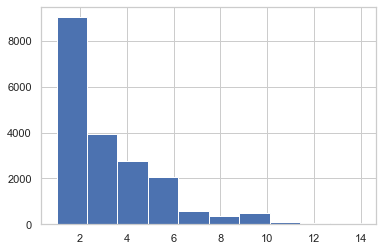

In [53]:
analisis_cliente['DESFASE_CEF_MESES_REAL'].hist()

In [54]:
analisis_cliente['NO_TIENE_CEF_COMPARABLE'] = analisis_cliente['DESFASE_CEF_MESES_REAL'].apply(lambda _: 1 if pd.isnull(_) else 0)

In [55]:
del analisis_cliente['PERIODO_DATE_x']
del analisis_cliente['PERIODO_DATE_y']
del analisis_cliente['DIFF_MONTH_DATE_CEF']

In [56]:
pd.crosstab(
    analisis_cliente['NO_TIENE_CEF_COMPARABLE'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
NO_TIENE_CEF_COMPARABLE,,,,,,,,,
0,1671,1793,1910,1944,1997,2508,2522,2540,2544
1,757,706,597,550,504,384,378,363,346


In [57]:
pd.crosstab(
    analisis_cliente['DESFASE_CEF_MESES_REAL'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
DESFASE_CEF_MESES_REAL,,,,,,,,,
-1.0,757,706,597,550,504,384,378,363,346
1.0,449,294,694,390,365,1853,12,45,427
2.0,873,420,244,642,348,80,1849,11,31
3.0,128,779,286,173,550,84,82,1835,10
4.0,97,106,454,205,140,157,91,81,1433
5.0,112,87,85,351,160,54,158,92,81
6.0,10,98,70,64,283,72,55,158,92
7.0,2,8,72,52,52,121,72,54,154
8.0,0,1,5,63,46,24,118,68,54


## >> FECHA CIERRE SALDOS DIARIOS

In [58]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [59]:
riesgo_fecha_cierre = """
    SELECT * FROM ODS.HD_VMVP_RIESGO_CIERRE_MES_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
fecha_cierre = pd.read_sql(
   riesgo_fecha_cierre , connection_market
)
fecha_cierre.head(2)

,PERIODO,TIPOPRODUCTO,CODUNICOCLI,SALD0
0,201907,COL_DIRECTAS,0000002469,1.184270e+05
1,201907,COL_DIRECTAS,0000003392,1.242679e+06


In [60]:
fecha_cierre['PERIODO'].min(), fecha_cierre['PERIODO'].max()

('201907', '202106')

In [61]:
fecha_cierre.columns = [col.upper().strip() for col in fecha_cierre.columns]
fecha_cierre['SALD0']

0        1.184270e+05
1        1.242679e+06
2        1.167301e+05
3        2.142857e+04
4        4.251070e+06
             ...     
57787    2.798982e+04
57788    1.686973e+07
57789    2.606429e+05
57790    1.590848e+05
57791    6.483825e+03
Name: SALD0, Length: 57792, dtype: float64

In [62]:
fecha_cierre[fecha_cierre['CODUNICOCLI'] == '0000002469'].sort_values(by=['PERIODO'], ascending=False).head(10)

,PERIODO,TIPOPRODUCTO,CODUNICOCLI,SALD0
11883,201909,COL_DIRECTAS,0000002469,0.000000
23273,201909,COL_INDIRECTAS,0000002469,0.000000
3531,201908,COL_DIRECTAS,0000002469,49897.227679
11252,201908,COL_INDIRECTAS,0000002469,224662.654844
0,201907,COL_DIRECTAS,0000002469,118426.982143
2907,201907,COL_INDIRECTAS,0000002469,218971.642085


In [63]:
pivoteo = pd.pivot_table(
    fecha_cierre, 
    values='SALD0', index='CODUNICOCLI', columns=['PERIODO', 'TIPOPRODUCTO'], aggfunc='sum', fill_value=0
).unstack().reset_index()

pivoteo.columns = ['PERIODO', 'TIPOPRODUCTO'] + ['COD_UNICO', 'SALDO']
pivoteo.head()

,PERIODO,TIPOPRODUCTO,COD_UNICO,SALDO
0,201907,COL_DIRECTAS,0000002469,1.184270e+05
1,201907,COL_DIRECTAS,0000003392,1.242679e+06
2,201907,COL_DIRECTAS,0000006114,1.167301e+05
3,201907,COL_DIRECTAS,0000006726,2.142857e+04
4,201907,COL_DIRECTAS,0000008045,4.251070e+06


In [64]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='SALDO', index=['PERIODO','COD_UNICO'], columns=['TIPOPRODUCTO'], aggfunc='sum', fill_value=0
).reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'RIESGO_DIRECTO_CIERRE_MES', 'RIESGO_INDIRECTO_CIERRE_MES']
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
pivoteo['COD_UNICO'] = pivoteo['COD_UNICO'].astype(str)
pivoteo.head()

,PERIODO,COD_UNICO,RIESGO_DIRECTO_CIERRE_MES,RIESGO_INDIRECTO_CIERRE_MES
0,201907,0000002469,1.184270e+05,218971.642085
1,201907,0000003392,1.242679e+06,0.000000
2,201907,0000006114,1.167301e+05,12154.000000
3,201907,0000006726,2.142857e+04,0.000000
4,201907,0000008045,4.251070e+06,0.000000


In [65]:
pivoteo[pivoteo['COD_UNICO'] == '0000002469'].sort_values(by=['PERIODO'], ascending=False).head(10)

,PERIODO,COD_UNICO,RIESGO_DIRECTO_CIERRE_MES,RIESGO_INDIRECTO_CIERRE_MES
58144,202106,0000002469,0.0,0.0
55616,202105,0000002469,0.0,0.0
53088,202104,0000002469,0.0,0.0
50560,202103,0000002469,0.0,0.0
48032,202102,0000002469,0.0,0.0
45504,202101,0000002469,0.0,0.0
42976,202012,0000002469,0.0,0.0
40448,202011,0000002469,0.0,0.0
37920,202010,0000002469,0.0,0.0
35392,202009,0000002469,0.0,0.0


In [66]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(24014, 2690)
(24014, 2692)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,INVERSION_ACTFIJOS_ANUAL_CEF_SITUACION,RSOL_1B_SOLVENCIA_CEF_SITUACION,ROTACION_CTASXCOBRAR_VAR_CEF_SITUACION,DTOTAL_S_VENTAS_VAR_CEF_SITUACION,RSOL_14_SOLVENCIA_CEF_SITUACION,COBERTURA_SERVICIO_DEUDA_CEF_SITUACION,DESFASE_CEF_MESES_REAL,NO_TIENE_CEF_COMPARABLE,RIESGO_DIRECTO_CIERRE_MES,RIESGO_INDIRECTO_CIERRE_MES
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,50.000000,0.758181,0.788935,1.449118,0.517969,NaN,2.0,0,0.000000,0.000000
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,96.000000,0.701240,1.817992,0.950059,0.098219,NaN,2.0,0,27160.973214,0.000000
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,157.714286,0.761583,0.409483,0.768326,1.729123,NaN,1.0,0,523502.213143,117678.171929


In [67]:
def simple_divv(a, b):
    if b == 0 and a == 0:
        return 0
    if b == 0:
        return 1
    
    return a / b

def create_saldos_diarios(pivoteo, col):
    col_listado = 'listado_cierre'
    acum = generate_listado_u3m(pivoteo, col_listado, values=col, index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum)
    
    acum['NRO_MESES_CON_' + col + '_EN_CERO'] = acum[col_listado].apply(searhc_no_zero).astype(int)
    acum['TIENE_1_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 1).astype(int)
    acum['TIENE_2_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 2).astype(int)
    acum['TIENE_3_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 3).astype(int)
    acum['TIENE_4_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 4).astype(int)
    acum['TIENE_5_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 5).astype(int)
    acum['TIENE_6_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 6).astype(int)
    acum['TIENE_7_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 7).astype(int)
    acum['TIENE_8_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 8).astype(int)
    acum['TIENE_9_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 9).astype(int)
    acum['TIENE_10_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 10).astype(int)
    acum['TIENE_11_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 11).astype(int)
    acum['TIENE_12_O_MAS_MESES_CON_' + col + '_EN_CERO'] = acum['NRO_MESES_CON_' + col + '_EN_CERO'].apply(lambda _: _ >= 12).astype(int)
    
    acum['ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum[col_listado].apply(lambda _: simple_divv(np.mean(_[-3:]), np.mean(_[-6:-3])))
    
    acum['TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ > 1)
    acum['TIENE_MAYORIGUAL_1_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1).astype(int)
    acum['TIENE_MAYORIGUAL_1.05_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.05).astype(int)
    acum['TIENE_MAYORIGUAL_1.1_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.1).astype(int)
    acum['TIENE_MAYORIGUAL_1.15_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.15).astype(int)
    acum['TIENE_MAYORIGUAL_1.2_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.2).astype(int)
    acum['TIENE_MAYORIGUAL_1.25_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.25).astype(int)
    acum['TIENE_MAYORIGUAL_1.3_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.3).astype(int)
    acum['TIENE_MAYORIGUAL_1.35_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.35).astype(int)
    acum['TIENE_MAYORIGUAL_1.4_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.4).astype(int)
    acum['TIENE_MAYORIGUAL_1.45_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.45).astype(int)
    acum['TIENE_MAYORIGUAL_1.5_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.5).astype(int)
    acum['TIENE_MAYORIGUAL_1.55_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ >= 1.55).astype(int)

    acum['TIENE_MENORL_1_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ < 1).astype(int)
    acum['TIENE_MENORIGUAL_0.95_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.95).astype(int)
    acum['TIENE_MENORIGUAL_0.9_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.9).astype(int)
    acum['TIENE_MENORIGUAL_0.85_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.85).astype(int)
    acum['TIENE_MENORIGUAL_0.8_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.8).astype(int)
    acum['TIENE_MENORIGUAL_0.75_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.75).astype(int)
    acum['TIENE_MENORIGUAL_0.7_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.7).astype(int)
    acum['TIENE_MENORIGUAL_0.65_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.65).astype(int)
    acum['TIENE_MENORIGUAL_0.6_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.6).astype(int)
    acum['TIENE_MENORIGUAL_0.55_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.55).astype(int)
    acum['TIENE_MENORIGUAL_0.5_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.5).astype(int)
    acum['TIENE_MENORIGUAL_0.45_ULT_TRIM_OVER_TRIM_PASADO_' + col] = acum['ULT_TRIM_OVER_TRIM_PASADO_' + col].apply(lambda _: _ <= 0.45).astype(int)
    
    acum['U1M_2M_OVER_U12M_U11M_' + col] = acum[col_listado].apply(lambda _: simple_divv(np.mean(_[-12:-10]), np.mean(_[-2:])))
    
    acum['TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ > 1)
    acum['TIENE_MAYORIGUAL_1_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1).astype(int)
    acum['TIENE_MAYORIGUAL_1.05_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.05).astype(int)
    acum['TIENE_MAYORIGUAL_1.1_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.1).astype(int)
    acum['TIENE_MAYORIGUAL_1.15_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.15).astype(int)
    acum['TIENE_MAYORIGUAL_1.2_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.2).astype(int)
    acum['TIENE_MAYORIGUAL_1.25_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.25).astype(int)
    acum['TIENE_MAYORIGUAL_1.3_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.3).astype(int)
    acum['TIENE_MAYORIGUAL_1.35_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.35).astype(int)
    acum['TIENE_MAYORIGUAL_1.4_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.4).astype(int)
    acum['TIENE_MAYORIGUAL_1.45_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.45).astype(int)
    acum['TIENE_MAYORIGUAL_1.5_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.5).astype(int)
    acum['TIENE_MAYORIGUAL_1.55_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ >= 1.55).astype(int)
    
    acum['TIENE_MENORL_1_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ < 1).astype(int)
    acum['TIENE_MENORIGUAL_0.95_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.95).astype(int)
    acum['TIENE_MENORIGUAL_0.9_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.9).astype(int)
    acum['TIENE_MENORIGUAL_0.85_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.85).astype(int)
    acum['TIENE_MENORIGUAL_0.8_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.8).astype(int)
    acum['TIENE_MENORIGUAL_0.75_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.75).astype(int)
    acum['TIENE_MENORIGUAL_0.7_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.7).astype(int)
    acum['TIENE_MENORIGUAL_0.65_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.65).astype(int)
    acum['TIENE_MENORIGUAL_0.6_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.6).astype(int)
    acum['TIENE_MENORIGUAL_0.55_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.55).astype(int)
    acum['TIENE_MENORIGUAL_0.5_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.5).astype(int)
    acum['TIENE_MENORIGUAL_0.45_U1M_2M_OVER_U12M_U11M_' + col] = acum['U1M_2M_OVER_U12M_U11M_' + col].apply(lambda _: _ <= 0.45).astype(int)
    
    return acum

In [68]:
for col in ['RIESGO_DIRECTO_CIERRE_MES', 'RIESGO_INDIRECTO_CIERRE_MES']:
    print(col.upper())
    acum = create_saldos_diarios(pivoteo, col)
    acum['COD_UNICO'] =  acum['COD_UNICO'].astype(str)
    acum['PERIODO'] =  acum['PERIODO'].astype(str)
    print("/"*100)
    
    print(analisis_cliente.shape)
    analisis_cliente = analisis_cliente.merge(
        acum, how='left', on=['PERIODO', 'COD_UNICO']
    )
    print(analisis_cliente.shape)

del pivoteo

RIESGO_DIRECTO_CIERRE_MES
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2528, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5056, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7584, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(10112, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(12640, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(15168, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(17696, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(20224, 3)
/////////////////////////////////////////////////////////

##### >>>> SALDO PROMEDIO

In [69]:
del acum

In [70]:
pivoteo = pd.pivot_table(
    fecha_cierre, 
    values='SALD0_PROMEDIO', index='CODUNICOCLI', columns=['PERIODO', 'TIPOPRODUCTO'], aggfunc='sum', fill_value=0
).unstack().reset_index()

pivoteo.columns = ['PERIODO', 'TIPOPRODUCTO'] + ['COD_UNICO', 'SALD0_PROMEDIO']
pivoteo.head()

KeyError: 'SALD0_PROMEDIO'

In [ ]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='SALD0_PROMEDIO', index=['PERIODO','COD_UNICO'], columns=['TIPOPRODUCTO'], aggfunc='sum', fill_value=0
).reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'RIESGO_PROMEDIO_DIRECTO_CIERRE', 'RIESGO_PROMEDIO_INDIRECTO_CIERRE']
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
pivoteo['COD_UNICO'] = pivoteo['COD_UNICO'].astype(str)
pivoteo.head()

In [ ]:
for col in ['RIESGO_PROMEDIO_DIRECTO_CIERRE', 'RIESGO_PROMEDIO_INDIRECTO_CIERRE']:
    print(col.upper())
    acum = create_saldos_diarios(pivoteo, col)
    acum['COD_UNICO'] =  acum['COD_UNICO'].astype(str)
    acum['PERIODO'] =  acum['PERIODO'].astype(str)
    print("/"*100)
    
    print(analisis_cliente.shape)
    analisis_cliente = analisis_cliente.merge(
        acum, how='left', on=['PERIODO', 'COD_UNICO']
    )
    print(analisis_cliente.shape)

del pivoteo

In [ ]:
acum.columns

In [ ]:

del acum

In [ ]:
analisis_cliente.to_csv("AVANCE_5.csv", index=False)

In [ ]:
analisis_cliente['PERIODO'].value_counts()

In [ ]:
print([col for col in analisis_cliente.columns if 'SITUACION' in col.upper()])